In [1]:
import pandas as pd


In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/home/placement/Desktop/BhanuSiva4K8/fiat500.csv")

In [4]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [5]:
data.info

<bound method DataFrame.info of         ID   model  engine_power  age_in_days      km  previous_owners  \
0        1  lounge            51          882   25000                1   
1        2     pop            51         1186   32500                1   
2        3   sport            74         4658  142228                1   
3        4  lounge            51         2739  160000                1   
4        5     pop            73         3074  106880                1   
...    ...     ...           ...          ...     ...              ...   
1533  1534   sport            51         3712  115280                1   
1534  1535  lounge            74         3835  112000                1   
1535  1536     pop            51         2223   60457                1   
1536  1537  lounge            51         2557   80750                1   
1537  1538     pop            51         1766   54276                1   

            lat        lon  price  
0     44.907242   8.611560   8900  
1     4

In [6]:
data=data.drop(['ID','lat','lon'],axis=1)

In [7]:
data

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [8]:
data1=data.loc[(data.model=='lounge')]

In [9]:
data1=pd.get_dummies(data1)

In [10]:
data1

,engine_power,age_in_days,km,previous_owners,price,model_lounge
0,51,882,25000,1,8900,1
3,51,2739,160000,1,6000,1
6,51,731,11600,1,10750,1
7,51,1521,49076,1,9190,1
11,51,366,17500,1,10990,1
...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1
1529,51,731,22551,1,9900,1
1530,51,670,29000,1,10800,1
1534,74,3835,112000,1,4600,1


In [11]:
y=data1['price']
x=data1.drop('price',axis=1)

In [12]:
x


,engine_power,age_in_days,km,previous_owners,model_lounge
0,51,882,25000,1,1
3,51,2739,160000,1,1
6,51,731,11600,1,1
7,51,1521,49076,1,1
11,51,366,17500,1,1
...,...,...,...,...,...
1528,51,2861,126000,1,1
1529,51,731,22551,1,1
1530,51,670,29000,1,1
1534,74,3835,112000,1,1


In [13]:
y

0        8900
3        6000
6       10750
7        9190
11      10990
        ...  
1528     5500
1529     9900
1530    10800
1534     4600
1536     5990
Name: price, Length: 1094, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1


In [16]:
x_train.shape

(732, 5)

In [17]:
x_test

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1
...,...,...,...,...,...
757,51,4018,102841,1,1
167,51,397,15341,1,1
156,51,1858,35304,1,1
1145,51,456,14970,1,1


In [18]:
y_train.head(5)

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [19]:
x_train.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
441,51,762,36448,1,1
701,51,701,27100,1,1
695,51,3197,51083,1,1
1415,51,670,33000,1,1
404,51,456,14000,1,1


In [20]:
x_test

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1
...,...,...,...,...,...
757,51,4018,102841,1,1
167,51,397,15341,1,1
156,51,1858,35304,1,1
1145,51,456,14970,1,1


In [21]:
y_test

676     10250
215      9790
146      5500
1319     9900
1041     8900
        ...  
757      6000
167     10950
156      8000
1145    10700
1393     9400
Name: price, Length: 362, dtype: int64

In [22]:
x_train

,engine_power,age_in_days,km,previous_owners,model_lounge
441,51,762,36448,1,1
701,51,701,27100,1,1
695,51,3197,51083,1,1
1415,51,670,33000,1,1
404,51,456,14000,1,1
...,...,...,...,...,...
459,51,397,15628,1,1
654,51,3227,95554,1,1
189,51,1431,81900,1,1
1455,51,701,33942,1,1


In [23]:
y_train

441      8980
701     10300
695      5880
1415    10490
404      9499
        ...  
459     10850
654      5900
189     10000
1455     9400
1218     8900
Name: price, Length: 732, dtype: int64

In [24]:
#ridge regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [26]:
ridge_regressor.best_params_

{'alpha': 30}

In [27]:
#x_train=[2]

In [28]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [29]:
y_pred_ridge

array([10045.34777889,  9989.17153543,  4769.09960336, 10048.68323752,
        9813.94479825,  8678.14356117, 10173.79792135, 10180.6270078 ,
        9107.31525896,  5625.00740732, 10565.71108835,  6776.12815534,
        9677.36019112, 10348.97135978,  8049.20104733,  9526.33575316,
        7738.85607226,  9973.09944563, 10379.76191917,  9784.95620261,
       10390.79428386, 10429.52293694,  9867.32992522,  6316.76795239,
       10363.01826786, 10565.71108835, 10385.15644406,  8356.2693706 ,
        6052.94959183,  4562.66804027, 10340.47145405,  5796.55307957,
        9687.69883182, 10386.93279686,  7018.31868443,  7936.55917599,
        7765.92126381,  6169.45640953,  9811.27845178,  9882.52937837,
       10312.76262569,  9691.63232633, 10565.71108835,  6585.82855773,
        6916.6311432 , 10347.90965216, 10136.14357831,  8266.05175267,
       10133.53282186, 10426.05302378, 10264.14549009,  9629.21583316,
        9977.36553225,  9716.74149368,  9353.11972737,  9573.46229983,
      

In [30]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

519771.8129989745

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8373030813683994

In [32]:
Results=pd.DataFrame(columns=['Actual','predicted'])
Results['Actual']=y_test
Results['predicted']=y_pred_ridge

In [33]:
Results=pd.DataFrame(columns=['Actual','predicted'])
Results['Actual']=y_test
Results['predicted']=y_pred_ridge
#Result['km']=x_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,predicted,Id
0,676,10250,10045.347779,0
1,215,9790,9989.171535,1
2,146,5500,4769.099603,2
3,1319,9900,10048.683238,3
4,1041,8900,9813.944798,4
5,1425,9500,8678.143561,5
6,409,10450,10173.797921,6
7,617,9790,10180.627008,7
8,1526,9300,9107.315259,8
9,1010,4600,5625.007407,9


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

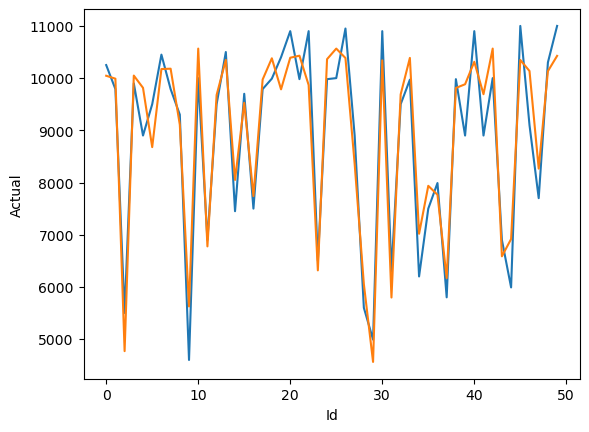

In [38]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='predicted',data=Results.head(50))
plt.plot()